In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

23/05/12 16:23:17 WARN Utils: Your hostname, pclab058 resolves to a loopback address: 127.0.1.1; using 147.96.133.21 instead (on interface eno1)
23/05/12 16:23:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/12 16:23:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/12 16:23:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/12 16:23:19 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data_path = "datos/sample_10e3.json"

In [8]:
df = spark.read.json(data_path)

In [4]:
df

DataFrame[_id: struct<$oid:string>, ageRange: bigint, idplug_base: bigint, idplug_station: bigint, idunplug_base: bigint, idunplug_station: bigint, travel_time: bigint, unplug_hourTime: struct<$date:string>, user_day_code: string, user_type: bigint, zip_code: string]

In [ ]:
df.show()

In [8]:
df.columns

['_id',
 'ageRange',
 'idplug_base',
 'idplug_station',
 'idunplug_base',
 'idunplug_station',
 'travel_time',
 'unplug_hourTime',
 'user_day_code',
 'user_type',
 'zip_code']

In [7]:
#1 Contar cada tipo
df.groupBy('user_type').count().show()

+---------+-----+
|user_type|count|
+---------+-----+
|        1|  954|
|        3|   36|
|        2|   10|
+---------+-----+



In [9]:
#1 Contar cada tipo
df.groupBy('ageRange').count().show()

+--------+-----+
|ageRange|count|
+--------+-----+
|       0|  491|
|       6|    5|
|       5|  131|
|       1|   19|
|       3|   75|
|       2|   12|
|       4|  267|
+--------+-----+



In [10]:
#1 Contar cada tipo
df.groupBy('idplug_base').count().show()

+-----------+-----+
|idplug_base|count|
+-----------+-----+
|         26|    9|
|         19|   26|
|         22|   38|
|          7|   45|
|         25|    6|
|          6|   33|
|          9|   49|
|         27|    5|
|         17|   37|
|          5|   50|
|          1|   49|
|         10|   31|
|          3|   54|
|         12|   39|
|          8|   44|
|         11|   39|
|          2|   64|
|          4|   49|
|         13|   27|
|         18|   29|
+-----------+-----+
only showing top 20 rows



In [16]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.6 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 6.1 MB/s eta 0:00:00m eta 0:00:01


# Pruebas de edad vs cuánto tiempo van en bici

 - Para poder hacer los gráficos necesitamos pasar 1º el dataframe al pandas y luego ya hacerle el plot. obviamente esto lo podemos hacer con pocos datos de prueba (luego no podremos). Pero nos sirve para tener una idea de cómo se comportan los datos.
 
 - Función clave: groupBy('columna que queramos'), luego podremos hacer sumas, medias, conteos, etc respecto a otras.

In [103]:
df2 = df.toPandas()

<AxesSubplot:xlabel='ageRange', ylabel='travel_time'>

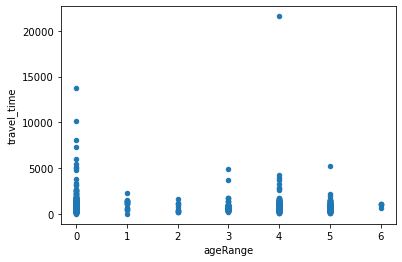

In [104]:
df2.plot.scatter(x="ageRange", y="travel_time")

In [105]:
#1 Contar cada tipo
df3 = df.gdf.count()roupBy('ageRange').sum('travel_time')

In [106]:
df3.show()

+--------+----------------+
|ageRange|sum(travel_time)|
+--------+----------------+
|       0|          465023|
|       6|            4914|
|       5|          103866|
|       1|           20765|
|       3|           62021|
|       2|            8102|
|       4|          239544|
+--------+----------------+



In [107]:
df3 = df3.orderBy('ageRange')

In [108]:
df3.columns

['ageRange', 'sum(travel_time)']

In [109]:
df3.show()

+--------+----------------+
|ageRange|sum(travel_time)|
+--------+----------------+
|       0|          465023|
|       1|           20765|
|       2|            8102|
|       3|           62021|
|       4|          239544|
|       5|          103866|
|       6|            4914|
+--------+----------------+



<AxesSubplot:ylabel='sum(travel_time)'>

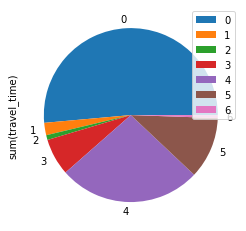

In [110]:
df3.toPandas().plot.pie(y='sum(travel_time)')

<AxesSubplot:xlabel='ageRange'>

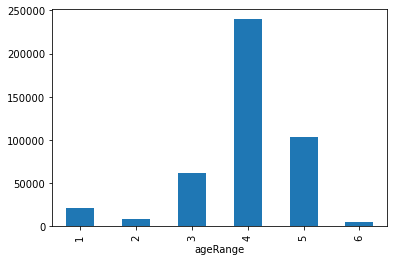

In [113]:
# quitamos la fila 0 que es la que tiene rangos de edades desconocidas, por eso no nos interesa
df3.toPandas().drop(0).plot.bar(x='ageRange', y='sum(travel_time)', legend=False)

# Pruebas para el conteo de cuantas bicis se desenganchan de un sitio vs cuántas se enganchan

Agrupamos los datos por los ids de las estaciones. Un dataframe con los plugs y otro con los un_plugs, y los contamos. Luego los unimos con un join con respecto al id. Así podemos ver comparar en cada estación cuantos ha habido de cada.

In [120]:
df1 = df.groupBy('idunplug_station').count()

In [121]:
df2 = df.groupBy('idplug_station').count()

In [122]:
# renombrar las columnas para unirlas
df1 = df1.withColumnRenamed('idunplug_station', 'id').withColumnRenamed('count', 'n_unplugs')
df2 = df2.withColumnRenamed('idplug_station', unplug_hourTime'id').withColumnRenamed('count', 'n_plugs')

In [123]:
df3 = df1.join(df2, on='id')

In [124]:
df3

DataFrame[id: bigint, n_unplugs: bigint, n_plugs: bigint]

In [125]:
df3.show()

+---+---------+-------+
| id|n_unplugs|n_plugs|
+---+---------+-------+
| 26|       12|     10|
| 29|        1|      1|
| 65|        8|      7|
| 54|        8|      8|
| 19|       17|      5|
|155|        2|     17|
|113|        4|      1|
|167|        9|      2|
|130|        3|      1|
| 77|        3|     13|
|  7|        8|      2|
| 34|        1|      4|
|126|        3|     10|
| 94|        3|      2|
|149|       10|     21|
| 50|        4|      3|
|190|        2|      5|
|110|        7|      1|
|136|        9|     22|
| 57|       34|     27|
+---+---------+-------+
only showing top 20 rows



 - **limit(10)**: Limitar a solo 10 estaciones (pàra que se vea en el plot)
 - **toPandas()**: para pasarlo a un pandas dataframe y poder plotear

<AxesSubplot:title={'center':'Visualización de la demanda de las estaciones'}, xlabel='id'>

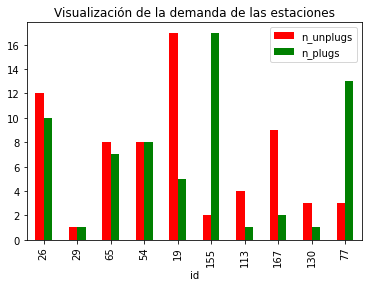

In [128]:
df3.limit(10).toPandas().plot.bar(
    x='id', 
    y=['n_unplugs','n_plugs'], 
    color=['red','green'],
    title="Visualización de la demanda de las estaciones"
)

Vamos ordenar ahora por la resta de ambas demandas. Así podemos ver qué estaciones quitan más bicis y luego no vuelven.

In [157]:
df.count()

1000